# TensorFlow Notebook

## Fundamentals


### Input Layer

- Meaning of None & Why don't need Batch size

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/wNWnn/outputting-a-sequence

- Input_shape vs Input_dim

https://stackoverflow.com/questions/53106111/in-keras-when-should-i-use-input-shape-instead-of-input-dim


### An Simple Explanation of RNN and its Implementation in TensorFlow

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/blByn/conceptual-overview

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/fP3ND/shape-of-the-inputs-to-the-rnn

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/wNWnn/outputting-a-sequence

### An Example of Stacking CNN and RNN

- Video:

https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/Ob5GY/bi-directional-lstms


- Code:

https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%204%20-%20S%2BP/S%2BP%20Week%204%20Lesson%201.ipynb

## Customization

### Functional API for Multiple Outputs or Inputs

- Examples:

https://github.com/chen-xin-94/Tensorflow_Advance_Techniques/tree/main/1-custom_models_layers_losses/week-1

### Custom Layers
- Lambda layer
    - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/ungradedLab/AFDgQ/lambda-layer
    - https://www.coursera.org/learn/tensorflow-sequences-time-series-and-prediction/lecture/I0K6b/lambda-layers
- Cumstom layers
    - https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/ungradedLab/laUcE/custom-dense-layer

### Custom Loss Function

Examples:
-   as Function:
    -   https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/wJIqv/adding-hyperparameters-to-custom-loss-functions
-   as Class
    -   https://www.coursera.org/learn/custom-models-layers-loss-functions-with-tensorflow/lecture/FS2QA/turning-loss-functions-into-classes

### Callback

Tutorial:

https://www.tensorflow.org/guide/keras/custom_callback#usage_of_logs_dict

Example:

In [ ]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

## Visualization

### An layer-by-layer visualization example

https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%208%20-%20Lesson%203%20-%20Notebook.ipynb#scrollTo=-8EHQyWGDvWz

### Keras plot_model

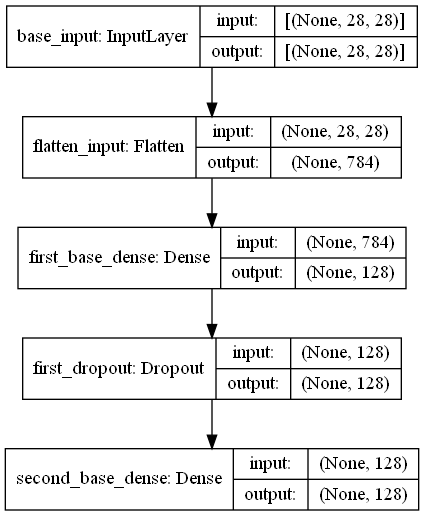

In [2]:
from tensorflow.python.keras.utils.vis_utils import plot_model

from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Lambda
from tensorflow.keras.models import Model
def initialize_base_network():
    input = Input(shape=(28,28,), name="base_input")
    x = Flatten(name="flatten_input")(input)
    x = Dense(128, activation='relu', name="first_base_dense")(x)
    x = Dropout(0.1, name="first_dropout")(x)
    x = Dense(128, activation='relu', name="second_base_dense")(x)
#     x = Dropout(0.1, name="second_dropout")(x)
#     x = Dense(128, activation='relu', name="third_base_dense")(x)
    return Model(inputs=input, outputs=x)
base_network = initialize_base_network()

plot_model(
    base_network, show_shapes=True, show_layer_names=True #, to_file='base-model.png'
)

## System

### Out-of-memory Solution:

In [1]:
# to have TensorFlow start out using only a minimum amount of memory and then allocate more as needed
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'